In [1]:
import pandas as pd
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,MaxPool2D,Flatten,Dropout
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("../datasets/mnist_train_small.csv").values

In [5]:
X = data[:,2:].reshape(-1,28,28,1)
y= data[:,1]

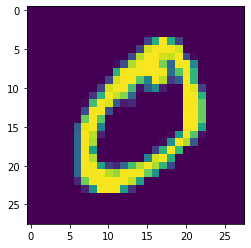

In [6]:
plt.imshow(X[0].reshape(28,28))

In [58]:
ohe = OneHotEncoder(categories="auto")
y_hot = ohe.fit_transform(y.reshape(-1,1)).todense()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y_hot, test_size=0.33, random_state=42)

In [60]:
inp_layer = Input(shape=[28,28,1])
layer_1 = Conv2D(32,(3,3),activation="relu")(inp_layer)
layer_2 = MaxPool2D()(layer_1)
layer_3 = Conv2D(64,(3,3),activation="relu")(layer_2)
layer_4 = MaxPool2D()(layer_3)
drop = Dropout(.25)(layer_4)
layer_5 = Conv2D(128,(3,3),activation="relu")(drop)
layer_6 = MaxPool2D()(layer_5)

flatten  = Flatten()(layer_6)

d1 = Dense(200,activation="relu")(flatten)
d2 = Dense(50,activation="relu")(d1)
d3 = Dense(10,activation="softmax")(d2)


In [61]:
model = Model(inputs=[inp_layer],output=[d3])

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`
  """Entry point for launching an IPython kernel.


In [62]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [63]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [64]:
history = model.fit(X_train,y_train,epochs=6,batch_size=200)

Epoch 1/6
5360/5360 [==============================] - 7s 1ms/step - loss: 7.8266 - acc: 0.2354
Epoch 2/6
5360/5360 [==============================] - 8s 1ms/step - loss: 1.3314 - acc: 0.5854
Epoch 3/6
5360/5360 [==============================] - 5s 1ms/step - loss: 0.4938 - acc: 0.8554
Epoch 4/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.3135 - acc: 0.9078
Epoch 5/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.2377 - acc: 0.9248
Epoch 6/6
5360/5360 [==============================] - 6s 1ms/step - loss: 0.1974 - acc: 0.9416


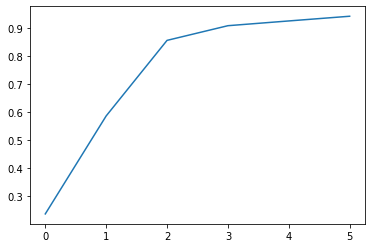

In [65]:
plt.plot(history.history["acc"])

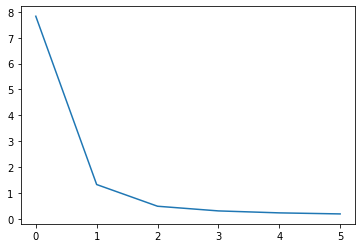

In [66]:
plt.plot(history.history["loss"])

In [67]:
model.evaluate(X_test,y_test)

2640/2640 [==============================] - 1s 497us/step


[0.155691163580526, 0.9484848484848485]

[[9 5 0 3 4 2 7 8 6 1]]


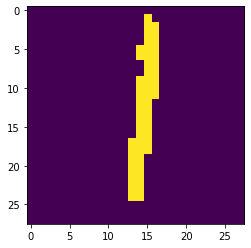

In [68]:
import cv2
one = cv2.imread("../datasets/nums/one.jpeg")
gray = cv2.cvtColor(one, cv2.COLOR_BGR2GRAY)
small = cv2.resize(gray, (28, 28))
small = (small < 100).astype(int) * 255
print(np.argsort(model.predict(np.array([small.reshape(28,28,1)]))))
plt.imshow(small)

## output of layer1

In [69]:
m2 = Model(inputs = [inp_layer], outputs = [layer_1])

In [70]:
m2.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [71]:
res = m2.predict(X_test[:1])

In [72]:
res

array([[[[0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ]],

        [[0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.01265021, 0.01236069, ..., 0.        ,
          0.        , 0. 

In [73]:
res.shape#(no. of outputs which depend upon no. of inputs as X[:1] change 1 to 10 u will get 10 , 26X26 , 32 images)

(1, 26, 26, 32)

In [74]:
res = res.reshape(26,26,32)

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


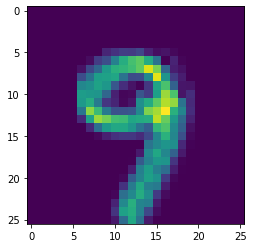

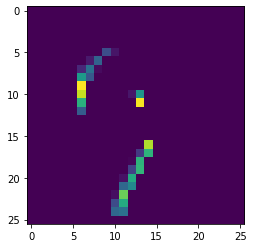

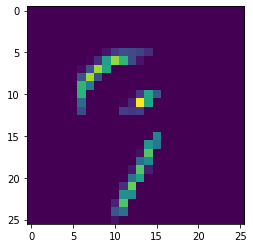

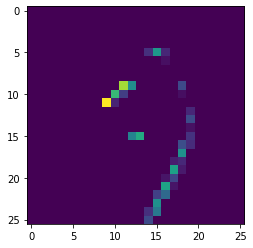

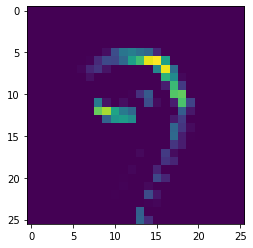

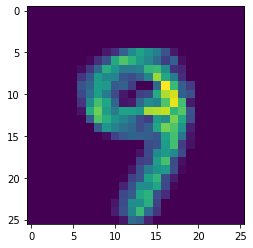

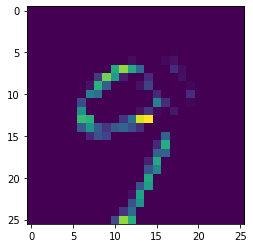

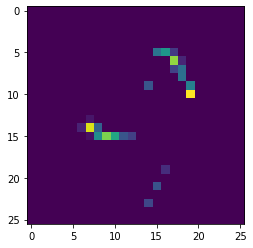

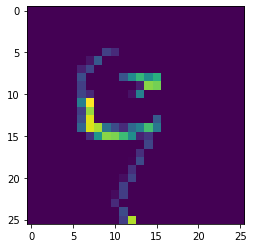

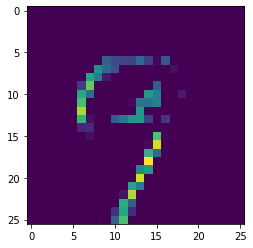

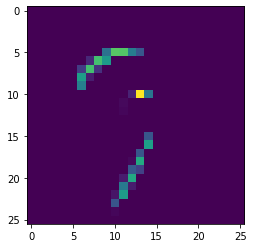

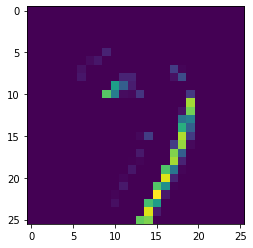

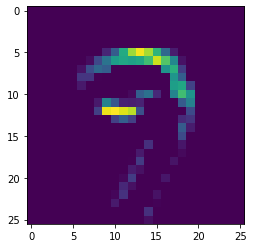

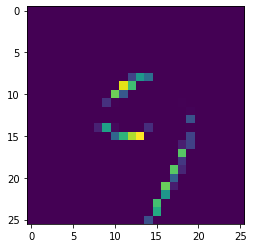

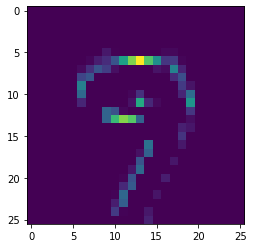

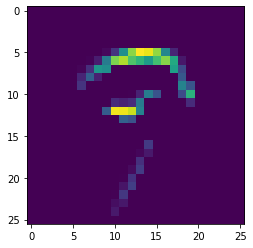

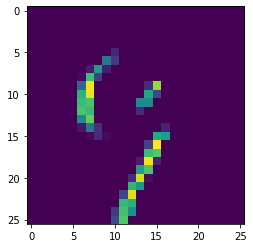

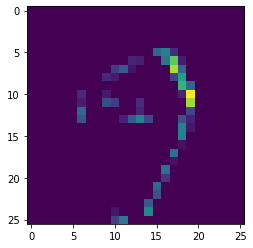

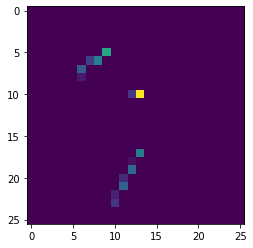

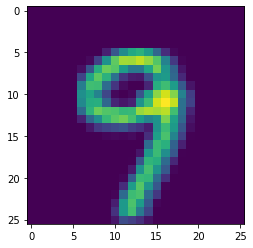

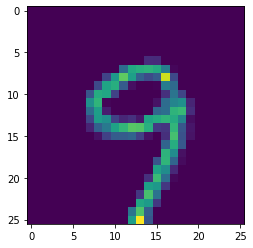

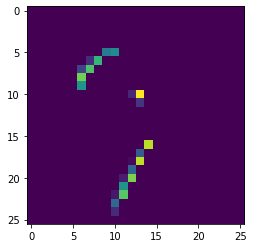

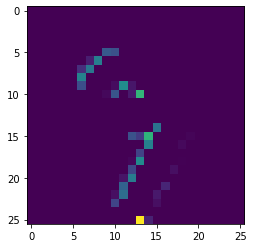

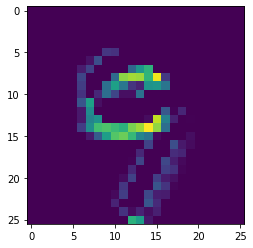

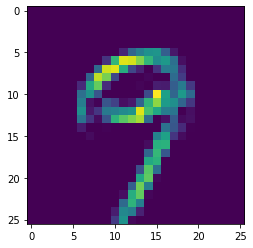

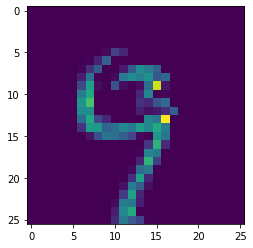

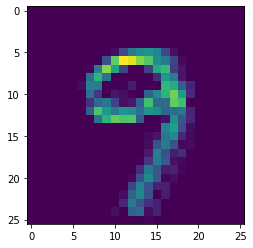

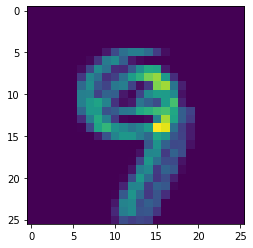

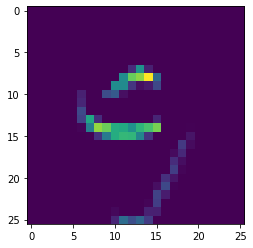

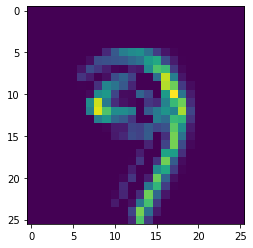

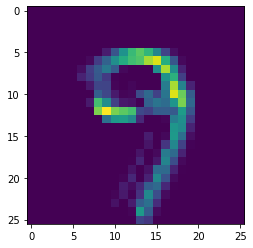

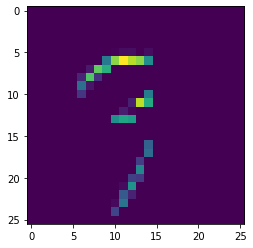

In [75]:
for i in range(res.shape[2]):
    plt.figure()
    img = res[:,:,i]
    plt.imshow(img)


## output of layer 2

In [76]:
m3 =  Model(inputs = [inp_layer], outputs = [layer_2])

In [77]:
m3.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [78]:
res = m3.predict(X[:1])

In [79]:
res.shape

(1, 13, 13, 32)

In [80]:
res = res.reshape(13,13,32)

c:\users\gippy\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


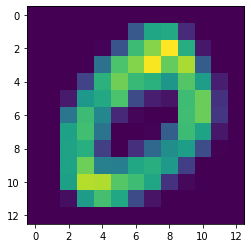

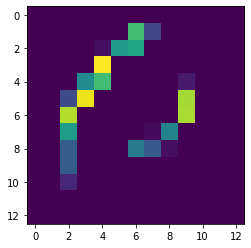

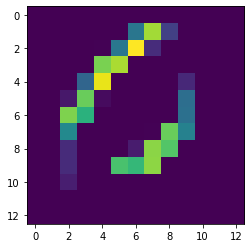

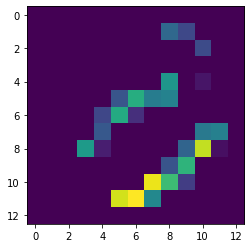

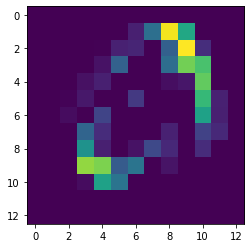

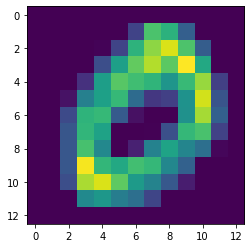

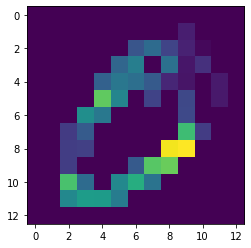

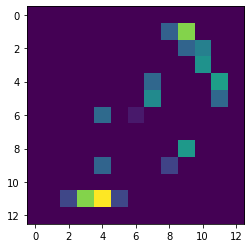

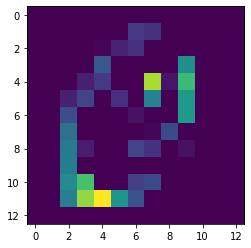

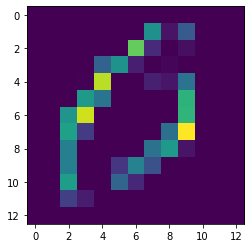

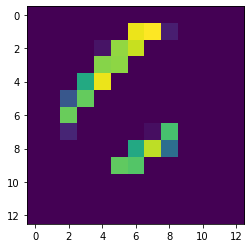

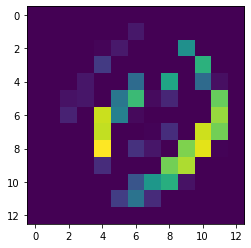

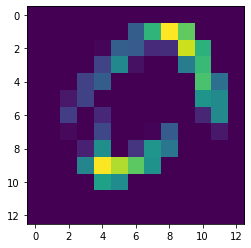

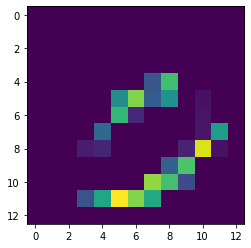

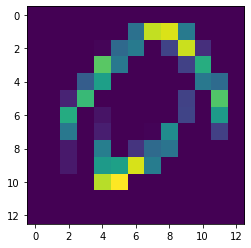

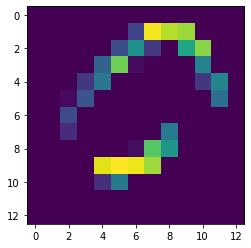

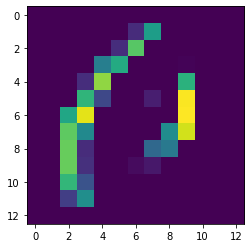

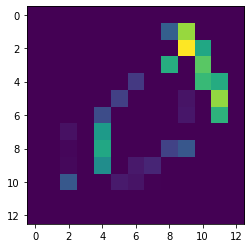

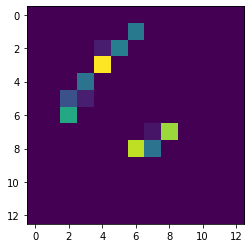

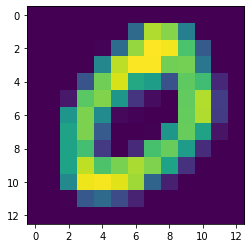

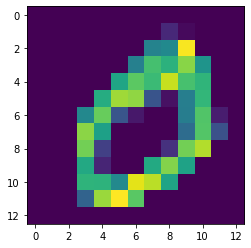

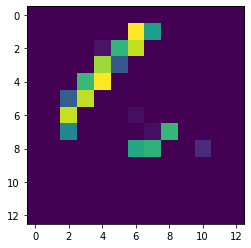

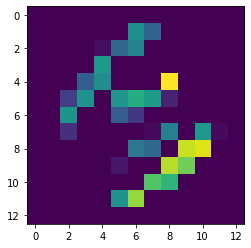

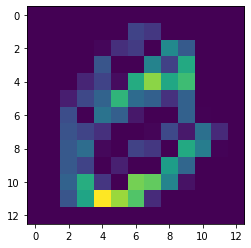

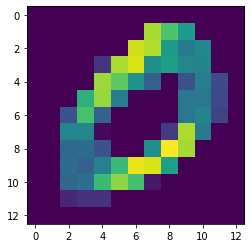

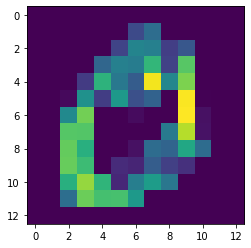

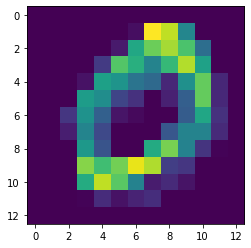

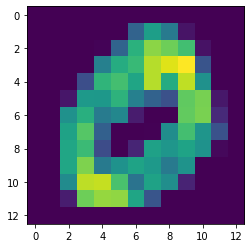

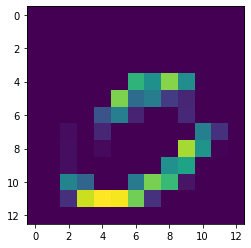

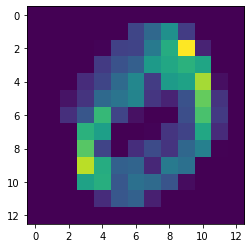

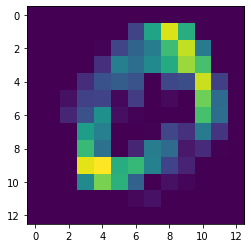

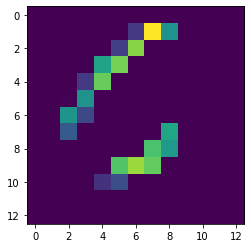

In [81]:
for i in range(res.shape[2]):
    plt.figure()
    img = res[:,:,i]
    plt.imshow(img)

In [82]:
y_test[:1]

matrix([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [103]:
model.layers

In [104]:
combined = model.layers[:-4]

In [111]:
de1 = Dense(400,activation="relu")(combined[-1].output)
de2 = Dense(100,activation="relu")(de1)
de3 = Dense(50,activation="relu")(de2)
eout = Dense(10,activation="softmax")(de3)

In [112]:
for layer in combined:
    layer.trainable = False

In [113]:
m4 = Model(inputs = [combined[0].input],outputs = [eout])

In [114]:
m4.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [115]:
m4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)         73856     
__________

In [110]:
m4.fit(X_train,y_train,epochs=6,batch_size=200)

ValueError: Error when checking target: expected dense_21 to have 4 dimensions, but got array with shape (5360, 10)